# Demystifying `meshgrid()`

We use the Numpy [meshgrid()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) function to plot 2D arrays but it can be a bit mysterious as to what the "meshgrid" actually does or look like.

The docs say: 

_Return coordinate matrices from coordinate vectors._

_Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,..., xn._

## Visualization with a Gaussian
Testing with the initial condition, an isotropic 2D [Gaussian](http://mathworld.wolfram.com/GaussianFunction.html)

$$
g_2(x, y) = \frac{1}{2\pi\sigma^2} \exp\left[-\frac{(x-x_0)^2 + (y-y_0)^2}{2\sigma^2}\right]
$$

Note that the 2D Gaussian can be written as a product of two 1D Gaussians

\begin{align}
g_2(x, y) &= \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right] \cdot 
          \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(y-y_0)^2}{2\sigma^2}\right]\\
        &= g_1(x) \cdot g_1(y)
\end{align}

Plot $g_2(x, y)$ by (1) constructing it from the product of $g_1$s and (2) from the explicit formula. Use [`np.meshgrid`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) to evaluate the function on a grid.

Use an *asymmetric* grid ($L_x=0.5, N_x=50$ and $L_y=1, N_y=100$) to clearly see the shape of the underlying arrays.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
L = 0.5
Lx, Ly = 0.5, 1
Nx, Ny = 50, 100

x = np.linspace(0, Lx, Nx+1)  # need N+1!
y = np.linspace(0, Ly, Ny+1)
X, Y = np.meshgrid(x, y)
    
def gaussian2D(x, y, u0=0.05, x0=None, y0=None, sigma=0.1*L):
    x0 = np.mean(x) if x0 is None else x0
    y0 = np.mean(y) if y0 is None else y0
    return u0/(2*np.pi*sigma) * np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma**2))

def gaussian(x, u0=0.05, x0=None, sigma=0.1*L):
    x0 = np.mean(x) if x0 is None else x0
    return u0/np.sqrt(2*np.pi*sigma) * np.exp(-(x-x0)**2 / (2*sigma**2))

#### Meshgrid 

In [4]:
print(x.shape, y.shape)
print(X.shape, Y.shape)
print(X)
print(Y)

(51,) (101,)
(101, 51) (101, 51)
[[0.   0.01 0.02 ... 0.48 0.49 0.5 ]
 [0.   0.01 0.02 ... 0.48 0.49 0.5 ]
 [0.   0.01 0.02 ... 0.48 0.49 0.5 ]
 ...
 [0.   0.01 0.02 ... 0.48 0.49 0.5 ]
 [0.   0.01 0.02 ... 0.48 0.49 0.5 ]
 [0.   0.01 0.02 ... 0.48 0.49 0.5 ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]


#### Plot 1D Gaussians
Plot the 1D Gaussians using the meshgrid components.

In [5]:
gaussian(X).shape

(101, 51)

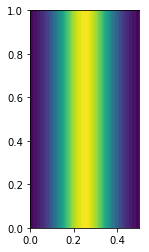

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, gaussian(X, sigma=0.1), 30, cmap=plt.cm.viridis)
ax.set_aspect(1)
plt.show()

In [7]:
gaussian(Y).shape

(101, 51)

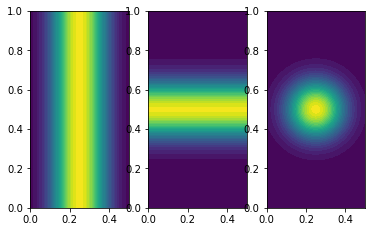

In [8]:
ax = plt.subplot(131)
ax.contourf(X, Y, gaussian(X, sigma=0.1), 30, cmap=plt.cm.viridis)
ax.set_aspect(1)
ax = plt.subplot(132)
ax.contourf(X, Y, gaussian(Y, sigma=0.1), 30, cmap=plt.cm.viridis)
ax.set_aspect(1)
ax = plt.subplot(133)
ax.contourf(X, Y, gaussian(X, sigma=0.1) * gaussian(Y, sigma=0.1), 30, cmap=plt.cm.viridis)
ax.set_aspect(1)

#### 2D gaussian 

In [9]:
gaussian2D(X, Y).shape

(101, 51)

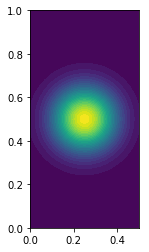

In [10]:
ax = plt.subplot(111)
ax.contourf(X, Y, gaussian2D(X, Y, sigma=0.1), 30, cmap=plt.cm.viridis)
ax.set_aspect(1)